<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK13/blob/main/Week_13_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ad Click Analysis

## Overview
**i. Understanding the context**  
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ our services as Data Science Consultants to help her identify which individuals are most likely to click on her ads. 

**ii. Specifying the objectives**  
The specific objective of this project is:  
> To build a model that identify's the individuals who are most likely to click on the ads in the blog

**iii. Defining the metric for success**  
The project will be considered successful when we accurately identify the individuals who are most likely to click on the client's ads.   

**iv. Data relevance**  
The appropriate dataset for this project is one that contains data  on the characteristics of the individuals who read the client's blogs.We have retrieved a dataset from http://bit.ly/IPAdvertisingData' and its appropriateness will be measured against the metrics of success. The following are the descriptions of the columns contained in the dataset:

* Daily Time Spent on Site: Time (in minutes) that the individual spent on the site
* Age: Individuals's age in years
* Area Income: Average income of geographical area of the individual
* Daily Internet Usage: Time (in minutes) that the individual spent on the internet 
* Ad Topic Line: Headline of the advertisement
* City: The individuals's city
* Male: Whether or not the individual was male (1=yes, 0=no)
* Country: The individuals's country
* Timestamp: Date and time the individual visited the site
* Clicked on Ad: Whether or not the individual clicked on an ad (1=yes, 0=no)

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the dataset with appropriate data for our project  
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies   
c. Perform univariate and bivariate analysis to gain insights on the given data  
d. Give conclusions and recommendations
e. Build a supervised learning model 

## Loading relevant packages

In [ ]:
library("data.table")
library("tidyverse")
devtools::install_github("moodymudskipper/cutr")
library(cutr)
devtools::install_github("paulponcet/modeest")
library(modeest)
install.packages('moments')
library(moments)
install.packages('janitor')
library(janitor)
install.packages('caTools')
library(caTools)
install.packages('caret')
library(caret)
install.packages('e1071')
library(e1071)
install.packages('ranger')
library(ranger)
install.packages('kernlab')
library(kernlab)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()




✔  checking for file ‘/tmp/RtmpCb7Srm/remotes3a25acda7e/moodymudskipper-cutr-7b8e9cd/DESCRIPTION’
─  preparing ‘cutr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘cutr_0.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




timeDate   (NA -> 3043.102 ) [CRAN]
clue       (NA -> 0.3-59   ) [CRAN]
stabledist (NA -> 0.7-1    ) [CRAN]
rmutil     (NA -> 1.1.5    ) [CRAN]
gss        (NA -> 2.2-2    ) [CRAN]
timeSeries (NA -> 3062.100 ) [CRAN]
statip     (NA -> 0.2.3    ) [CRAN]
stable     (NA -> 1.1.4    ) [CRAN]
fBasics    (NA -> 3042.89.1) [CRAN]


Installing 9 packages: timeDate, clue, stabledist, rmutil, gss, timeSeries, statip, stable, fBasics

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpCb7Srm/remotes3a36d0ea12/paulponcet-modeest-a168f94/DESCRIPTION’
─  preparing ‘modeest’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘modeest_2.4.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following object is masked from ‘package:modeest’:

    skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading requi

## Loading the dataset

In [ ]:
# load the dataset using fread funcion and instantiate it
data <- fread('http://bit.ly/IPAdvertisingData')

## Reading the data

In [ ]:
# preview the first few records in the dataset
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# find number of rows and columns in the dataframe using dim() function
dim(data)

[1] 1000   10

There are 1000 rows and 10 columns in the dataframe

In [ ]:
# check the data type of each variable using sapply() function
sapply(data, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Male
[1] "integer"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "integer"

"Clicked on Ad" and "Male" are categorical variables even though they have numeric values. Their data types will be changed in the data cleaning section. 

## Data cleaning

In [ ]:
# Standardize column names by lowering the case and replacing the spaces with underscores

# replace the spaces with underscores using gsub() function
names(data) <- gsub(" ","_", names(data))

# lower the case of the column names using tolower() function
names(data) <- tolower(names(data))

# display the column names to confirm the changes
colnames(data)

[1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"

In [ ]:
# find number of duplicated rows using anyDuplicated() function
anyDuplicated(data)

[1] 0

There are no duplicated rows in the dataframe

In [ ]:
# find the number of missing values in each column using is.na() and colSums() functions
colSums(is.na(data))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

There are no missing values in any of the columns

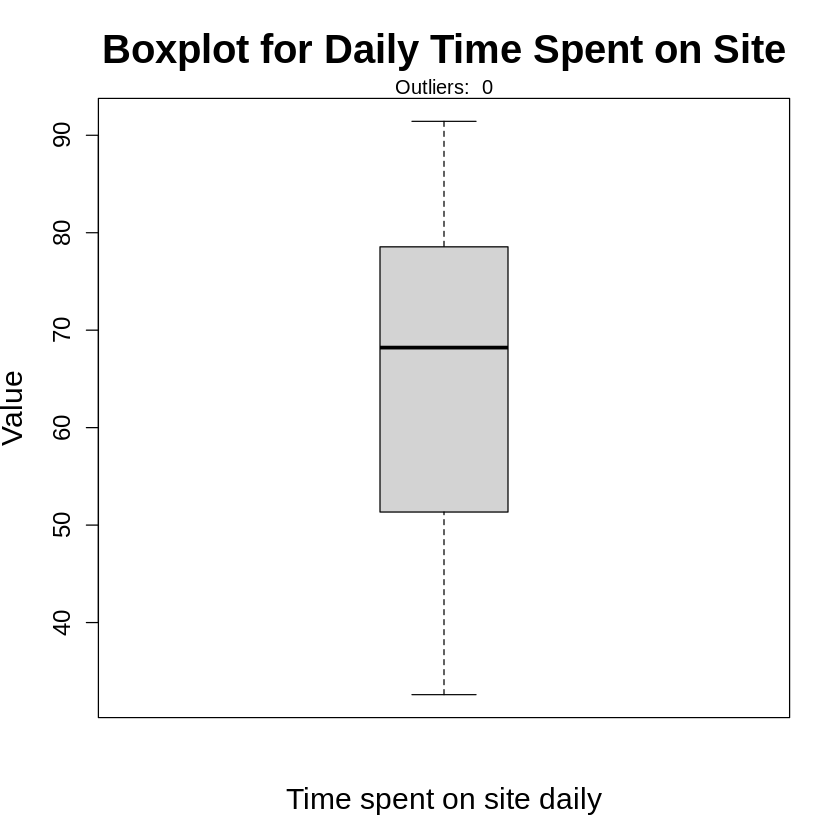

In [ ]:
# plot a boxplot to check for outliers in the 'daily_time_spent_on_site' column
boxplot(data$daily_time_spent_on_site, main="Boxplot for Daily Time Spent on Site", xlab = "Time spent on site daily", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_time_on_site <- boxplot.stats(data$daily_time_spent_on_site)$out
mtext(paste("Outliers: ", paste(length(outlier_time_on_site), collapse=", ")), cex=1)

There are no outliers in the 'daily_time_spent_on_site' column

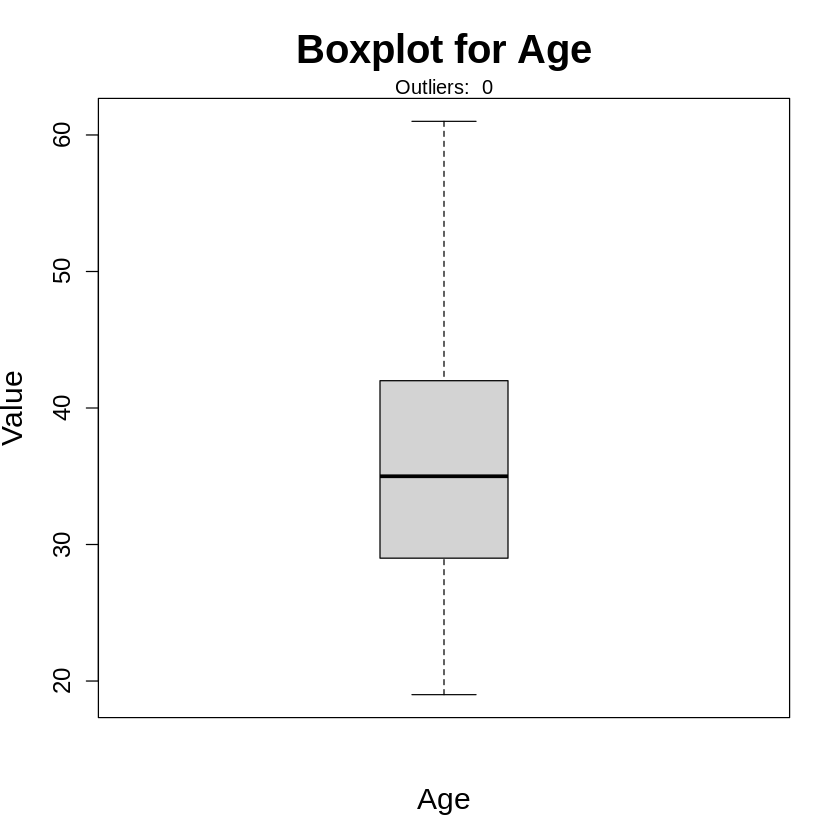

In [ ]:
# plot a boxplot to check for outliers in the 'age' column
boxplot(data$age, main="Boxplot for Age", xlab = "Age", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display number of outlier values in the column
outlier_age <- boxplot.stats(data$age)$out
mtext(paste("Outliers: ", paste(length(outlier_age), collapse=", ")), cex=1)

There are no outliers in the 'age' column

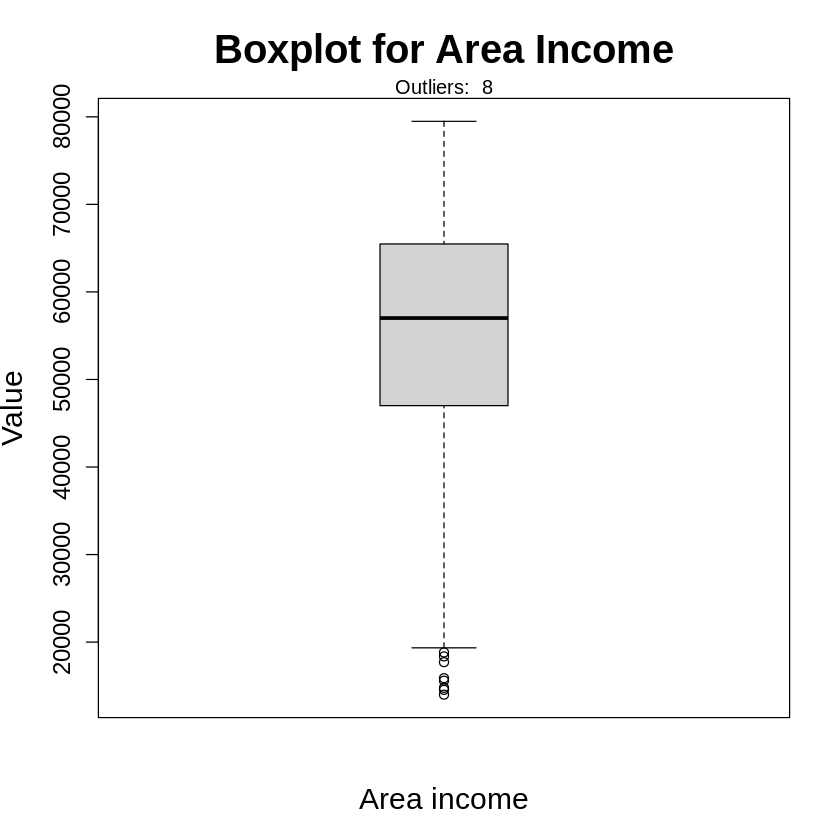

In [ ]:
# plot a boxplot to check for outliers in the 'area_income' column
boxplot(data$area_income, main="Boxplot for Area Income", xlab = "Area income", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_income <- boxplot.stats(data$area_income)$out
mtext(paste("Outliers: ", paste(length(outlier_income), collapse=", ")), cex=1)

Since the outliers in the column represent accurate values, we have no justifiable reason to drop them; for this reason, the outliers will be retained



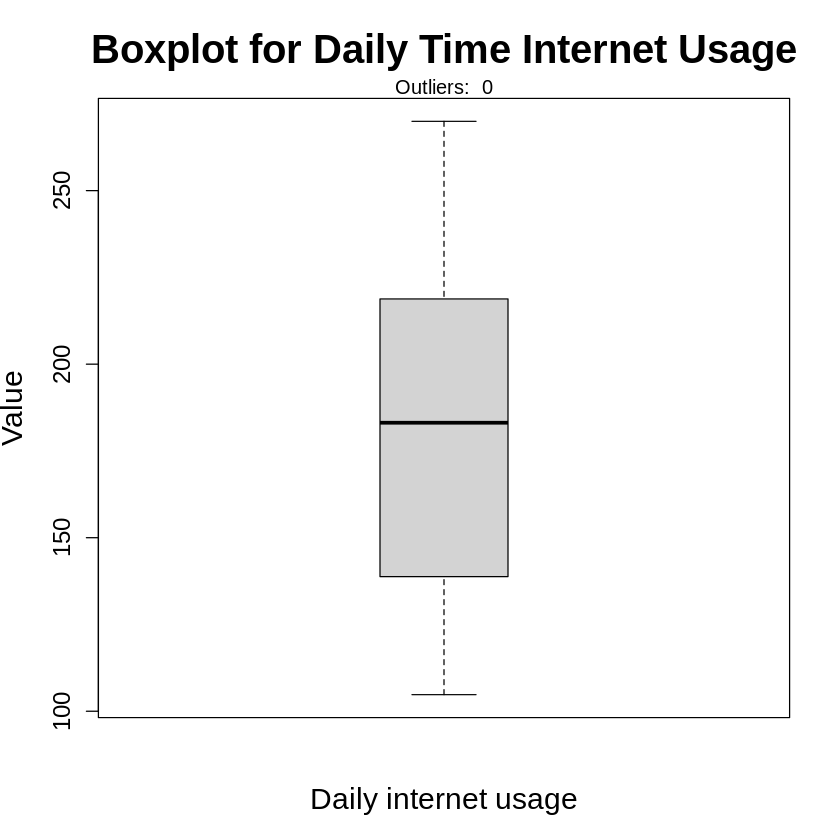

In [ ]:
# plot a boxplot to check for outliers in the 'daily_internet_usage' column
boxplot(data$daily_internet_usage, main="Boxplot for Daily Time Internet Usage", xlab = "Daily internet usage", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the outliers 
outlier_internet_usage <- boxplot.stats(data$daily_internet_usage)$out
mtext(paste("Outliers: ", paste(length(outlier_internet_usage), collapse=", ")), cex=1)

There are no outliers in the 'daily_internet_usage' column

In [ ]:
# check for anomalies in the 'city' column by scrutinizing its unique values 
print(unique(data$city))

  [1] "Wrightburgh"             "West Jodi"              
  [3] "Davidton"                "West Terrifurt"         
  [5] "South Manuel"            "Jamieberg"              
  [7] "Brandonstad"             "Port Jefferybury"       
  [9] "West Colin"              "Ramirezton"             
 [11] "West Brandonton"         "East Theresashire"      
 [13] "West Katiefurt"          "North Tara"             
 [15] "West William"            "New Travistown"         
 [17] "West Dylanberg"          "Pruittmouth"            
 [19] "Jessicastad"             "Millertown"             
 [21] "Port Jacqueline"         "Lake Nicole"            
 [23] "South John"              "Pamelamouth"            
 [25] "Harperborough"           "Port Danielleberg"      
 [27] "West Jeremyside"         "South Cathyfurt"        
 [29] "Palmerside"              "West Guybury"           
 [31] "Phelpschester"           "Lake Melindamouth"      
 [33] "North Richardburgh"      "Port Cassie"            
 [35] "New Tho

There are 969 unique values and no anomalies in the 'city' column

In [ ]:
# check for anomalies in the 'ad_topic_line' column by scrutinizing its unique values 
print(unique(data$ad_topic_line))

   [1] "Cloned 5thgeneration orchestration"                     
   [2] "Monitored national standardization"                     
   [3] "Organic bottom-line service-desk"                       
   [4] "Triple-buffered reciprocal time-frame"                  
   [5] "Robust logistical utilization"                          
   [6] "Sharable client-driven software"                        
   [7] "Enhanced dedicated support"                             
   [8] "Reactive local challenge"                               
   [9] "Configurable coherent function"                         
  [10] "Mandatory homogeneous architecture"                     
  [11] "Centralized neutral neural-net"                         
  [12] "Team-oriented grid-enabled Local Area Network"          
  [13] "Centralized content-based focus group"                  
  [14] "Synergistic fresh-thinking array"                       
  [15] "Grass-roots coherent extranet"                          
  [16] "Persistent demand

There are 1000 unique values and no anomalies in the 'ad_topic_line' column

In [ ]:
# check for anomalies in the 'male' column by scrutinizing its unique values 
print(unique(data$male))

[1] 0 1


There are 2 unique values and no anomalies in the 'male' column

In [ ]:
# rename the 'male' column to 'gender'
names(data)[names(data) == "male"] <- "gender"

# changing the data type to 'factor'
data$gender <- as.factor(data$gender)


In [ ]:
# check for anomalies in the 'country' column by scrutinizing its unique values 
print(unique(data$country))

  [1] "Tunisia"                                            
  [2] "Nauru"                                              
  [3] "San Marino"                                         
  [4] "Italy"                                              
  [5] "Iceland"                                            
  [6] "Norway"                                             
  [7] "Myanmar"                                            
  [8] "Australia"                                          
  [9] "Grenada"                                            
 [10] "Ghana"                                              
 [11] "Qatar"                                              
 [12] "Burundi"                                            
 [13] "Egypt"                                              
 [14] "Bosnia and Herzegovina"                             
 [15] "Barbados"                                           
 [16] "Spain"                                              
 [17] "Palestinian Territory"           

There are 237 unique values and no anomalies in the 'country' column

In [ ]:
# check for anomalies in the 'clicked_on_ad' column by scrutinizing its unique values 
print(unique(data$clicked_on_ad))

# change the data type to 'factor'
data$clicked_on_ad <- as.factor(data$clicked_on_ad)


[1] 0 1


There are 2 unique values and no anomalies in the 'clicked_on_ad' column

## Feature engineering

In [ ]:
# extract 'month', 'day' and 'hour' data from 'timestamp' column
data$month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%m")
data$part_of_month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%d")
data$part_of_day <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%H")

In [ ]:
# categorize the values in the 'part_of_month' column using ifelse() function 
data$part_of_month <- ifelse(data$part_of_month >='01' & data$part_of_month <= '10' ,"Early",
              ifelse(data$part_of_month >='11' & data$part_of_month <= '20',"Mid", "Late"))

In [ ]:
# categorize the values in the 'part_of_day' column
data$part_of_day <- ifelse(data$part_of_day >='00' & data$part_of_day <= '02' ,"Late night",
              ifelse(data$part_of_day >='03' & data$part_of_day <= '05',"Towards morning",
              ifelse(data$part_of_day >='06' & data$part_of_day <= '08',"Early morning",
              ifelse(data$part_of_day >='09' & data$part_of_day <= '11',"Late morning",
              ifelse(data$part_of_day >='12' & data$part_of_day <= '14',"Early afternoon",
              ifelse(data$part_of_day >='15' & data$part_of_day <= '17',"Late afternoon",
              ifelse(data$part_of_day >='18' & data$part_of_day <= '20',"Evening", "Night")))))))
              

In [ ]:
# drop irrelevant columns
setDT(data)[, c( "timestamp", "city", "ad_topic_line") := NULL]

In [ ]:
# preview the first few records of the dataset
head(data)

daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,country,clicked_on_ad,month,part_of_month,part_of_day
<dbl>,<int>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>
68.95,35,61833.90,256.09,0,Tunisia,0,03,Late,Late night
80.23,31,68441.85,193.77,1,Nauru,0,04,Early,Late night
69.47,26,59785.94,236.50,0,San Marino,0,03,Mid,Evening
74.15,29,54806.18,245.89,1,Italy,0,01,Early,Late night
68.37,35,73889.99,225.58,0,Iceland,0,06,Early,Towards morning
59.99,23,59761.56,226.74,1,Norway,0,05,Mid,Early afternoon


## Univariate analysis
Univariate analysis will help us gain insights on the general characteristics of the individual variables in the dataset.

### Numerical variables



#### Measures of central tendency

##### Daily time spent on site

In [ ]:
# compute the measures of central tendency of values in 'daily_time_spent_on_site' column
cat('The following are the measures of central tendency of daily time spent on site', '\n')
cat("Mean:", mean(data$daily_time_spent_on_site), '\n')
cat("Median:", median(data$daily_time_spent_on_site), '\n')
cat("Mode:", mfv(data$daily_time_spent_on_site), '\n')
cat("Number of modal values:", length(mfv(data$daily_time_spent_on_site)))

The following are the measures of central tendency of daily time spent on site 
Mean: 65.0002 
Median: 68.215 
Mode: 62.26 75.55 77.05 78.76 84.53 
Number of modal values: 5

##### Age

In [ ]:
# compute the measures of central tendency of values in 'age' column
cat('The following are the measures of central tendency of age', '\n')
cat("Mean:", mean(data$age), '\n')
cat("Median:", median(data$age), '\n')
cat("Mode:", mfv(data$age), '\n')
cat("Number of modal values:", length(mfv(data$age)))

The following are the measures of central tendency of age 
Mean: 36.009 
Median: 35 
Mode: 31 
Number of modal values: 1

##### Area income

In [ ]:
# compute the measures of central tendency of values in 'area_income' column
cat('The following are the measures of central tendency of area income', '\n')
cat("Mean:", mean(data$area_income), '\n')
cat("Median:", median(data$area_income), '\n')
cat("Mode:", mfv(data$area_income), '\n')
cat("Number of modal values:", length(mfv(data$area_income)))

The following are the measures of central tendency of area income 
Mean: 55000 
Median: 57012.3 
Mode: 13996.5 14548.06 14775.5 15598.29 15879.1 17709.98 18368.57 18819.34 19345.36 19991.72 20592.99 20856.54 21644.91 21773.22 22205.74 22456.04 22473.08 23410.75 23821.72 23936.86 23942.61 23975.35 24030.06 24078.93 24316.61 24593.33 24852.9 25371.52 25408.21 25583.29 25598.75 25603.93 25682.65 25686.34 25739.09 25767.16 26023.99 26130.93 27073.27 27086.4 27241.11 27262.51 27508.41 27964.6 28019.09 28028.74 28186.65 28210.03 28265.81 28271.84 28275.48 28357.27 28387.42 28495.21 28679.93 29359.2 29398.61 29727.79 29875.8 30227.98 30487.48 30726.26 30976 31072.44 31087.54 31092.93 31215.88 31265.75 31281.01 31343.39 31523.09 31947.65 31998.72 32006.82 32252.38 32536.98 32549.95 32593.59 32635.7 32689.04 32708.94 32847.53 33147.19 33239.2 33258.09 33293.78 33502.57 33553.9 33601.84 33813.08 33951.63 33987.27 34127.21 34191.13 34191.23 34309.24 34418.09 34886.01 34903.67 34942.26 35253.98 35

##### Daily internet usage

In [ ]:
# compute the measures of central tendency of values in 'daily_internet_usage' column
cat('The following are the measures of central tendency of daily internet usage', '\n')
cat("Mean: ", mean(data$daily_internet_usage), '\n')
cat("Median: ", median(data$daily_internet_usage), '\n')
cat("Mode: ", mfv(data$daily_internet_usage), '\n')
cat("Number of modal values: ", length(mfv(data$daily_internet_usage)))

The following are the measures of central tendency of daily internet usage 
Mean:  180.0001 
Median:  183.13 
Mode:  113.53 115.91 117.3 119.3 120.06 125.45 132.38 135.24 136.18 138.35 158.22 161.16 162.44 164.25 167.22 169.4 178.75 182.65 190.95 194.23 201.15 211.87 214.42 215.18 219.72 222.11 223.16 228.81 230.36 234.75 235.28 236.96 247.05 256.4 
Number of modal values:  34

#### Measures of dispersion

##### Daily time spent on site

In [ ]:
# compute the variance and standard deviation of the values in 'daily_time_spent_on_site' column
cat('The variance of daily time spent on site is:',var(data$daily_time_spent_on_site), '\n')
cat('The standard deviation of daily time spent on site is:',sd(data$daily_time_spent_on_site))

The variance of daily time spent on site is: 251.3371 
The standard deviation of daily time spent on site is: 15.85361

The standard deviation shows that the values are not so spread out from the mean and the variance shows that the degree to which each value differs from the mean is a bit high.

In [ ]:
# compute the range, minimum and maximum values in 'daily_time_spent_on_site' column
cat("The minimum time spent on site is:", min(data$daily_time_spent_on_site),'minutes', '\n')
cat("The maximum time spent on site is:", max(data$daily_time_spent_on_site),'minutes', '\n')
cat('The range between the minimum and maximum time spent on site is:', (max(data$daily_time_spent_on_site)-min(data$daily_time_spent_on_site)),'minutes')

The minimum time spent on site is: 32.6 minutes 
The maximum time spent on site is: 91.43 minutes 
The range between the minimum and maximum time spent on site is: 58.83 minutes

In [ ]:
# compute the skewness and kurtosis of values in the 'daily_time_on_site' column
cat('The following are skewness and kurtosis of daily time spent on site', '\n')
cat("Skewness: ", skewness(data$daily_time_spent_on_site), '\n')
cat("Kurtosis: ", kurtosis(data$daily_time_spent_on_site), '\n')

The following are skewness and kurtosis of daily time spent on site 
Skewness:  -0.370646 
Kurtosis:  -1.099864 


The values are fairly symmetrical, very slightly skewed to the left and platykurtic.

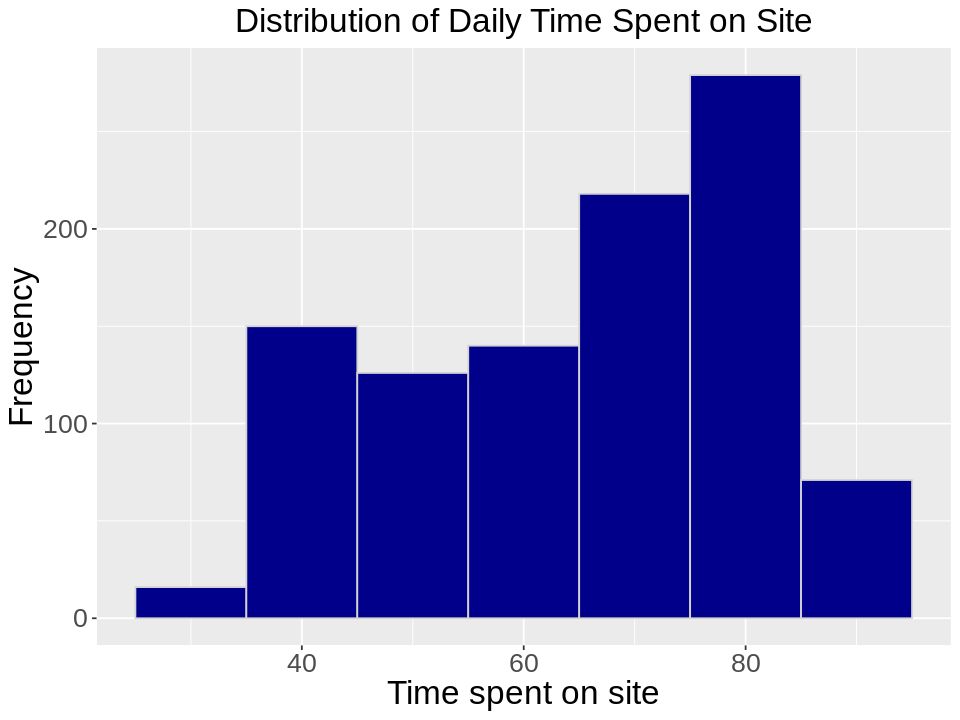

In [ ]:
# plot a histogram to visualize the distribution of values in 'daily_time_spent_on_site' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = daily_time_spent_on_site ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 10) +
    labs(title = "Distribution of Daily Time Spent on Site", x = "Time spent on site", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:
# compute the quantiles and interquartile range of the values in the 'daily_time_spent_on_site' column 
quantile(data$daily_time_spent_on_site)
cat('The interquartile range of daily time spent on site is:',IQR(data$daily_time_spent_on_site))

0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300

The interquartile range of daily time spent on site is: 27.1875

25% of the individuals spend less than 51.36 minutes on site and 75% of them spend less than 78.55 minutes on site



##### Age

In [ ]:
# compute the variance and standard deviation of the values in 'age' column
cat('The variance of age is:',var(data$age), '\n')
cat('The standard deviation of age is:',sd(data$age))

The variance of age is: 77.18611 
The standard deviation of age is: 8.785562

The standard deviation shows that the values are not so spread out from the mean and the variance shows that the degree to which each value differs from the mean is low.


In [ ]:
# compute the range, and the minimum and maximum values in 'age' column
cat("The minimum age of an is:", min(data$age),'years', '\n')
cat("The maximum age of is:", max(data$age),'years', '\n')
cat('The difference between the minimum and maximum ages is:', (max(data$age)-min(data$age)),'years')

The minimum age of an is: 19 years 
The maximum age of is: 61 years 
The difference between the minimum and maximum ages is: 42 years

In [ ]:
# compute the skewness and kurtosis of values in the 'age' column
cat('The following are skewness and kurtosis of age', '\n')
cat("Skewness: ", skewness(data$age), '\n')
cat("Kurtosis: ", kurtosis(data$age), '\n')

The following are skewness and kurtosis of age 
Skewness:  0.4777052 
Kurtosis:  -0.4097066 


The values are fairly symmetrical, very slightly skewed to the right and platykurtic

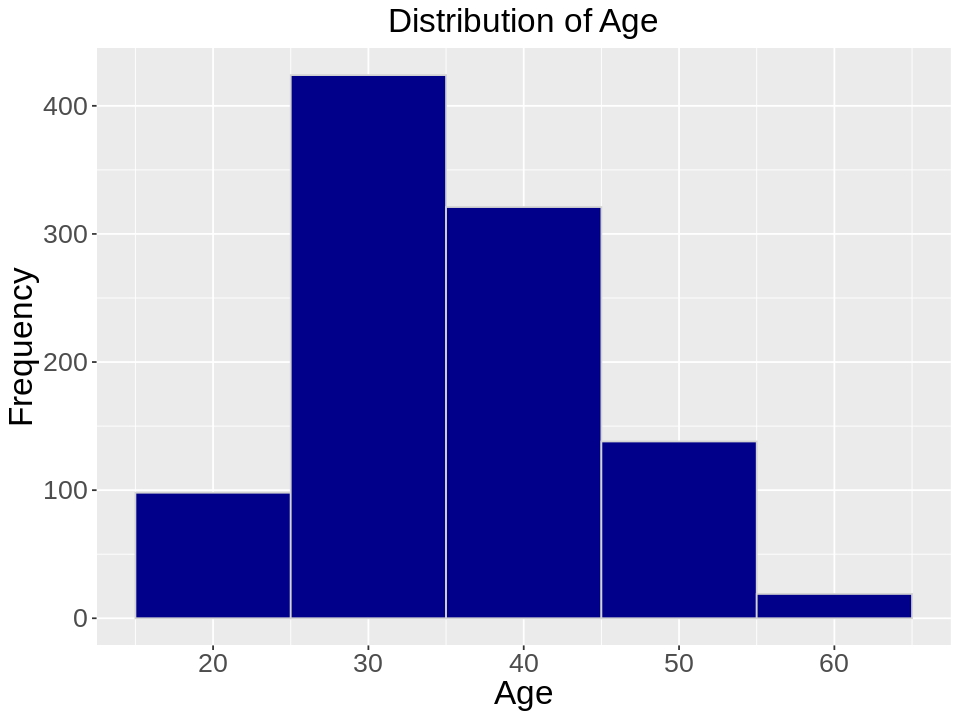

In [ ]:
# plot a histogram to visualize the distribution of values in 'age' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = age ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 10) +
    labs(title = "Distribution of Age", x = "Age", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:
# compute the quantiles and interquartile range of the values in the 'age' column 
quantile(data$age)
cat('The interquartile range of age is:',IQR(data$age))

0%  25%  50%  75% 100% 
  19   29   35   42   61

The interquartile range of age is: 13

25% of the individuals are below 29 years while 75% of them are below 42 years

##### Area income

In [ ]:
# compute the variance and standard deviation of the values in 'area_income' column
cat('The variance of area income is:',var(data$area_income), '\n')
cat('The standard deviation of area income is:',sd(data$area_income))

The variance of area income is: 179952406 
The standard deviation of area income is: 13414.63

The standard deviation shows that the values are spread out from the mean and the variance shows that the degree to which each value differs from the mean is very high.

In [ ]:
# compute the range, and the minimum and maximum values in 'area_income' column
cat("The minimum area income of is:", min(data$area_income),'Shillings', '\n')
cat("The maximum area income is:", max(data$area_income),'Shillings', '\n')
cat('The range between the minimum and maximum area incomes is:', (max(data$area_income)-min(data$area_income)),'Shillings')

The minimum area income of is: 13996.5 Shillings 
The maximum area income is: 79484.8 Shillings 
The range between the minimum and maximum area incomes is: 65488.3 Shillings

In [ ]:
# compute the skewness and kurtosis of values in the 'area_income' column
cat('The following are skewness and kurtosis of area income', '\n')
cat("Skewness: ", skewness(data$area_income), '\n')
cat("Kurtosis: ", kurtosis(data$area_income), '\n')

The following are skewness and kurtosis of area income 
Skewness:  -0.6484229 
Kurtosis:  -0.1110924 


The values are moderately skewed to the left and platykurtic

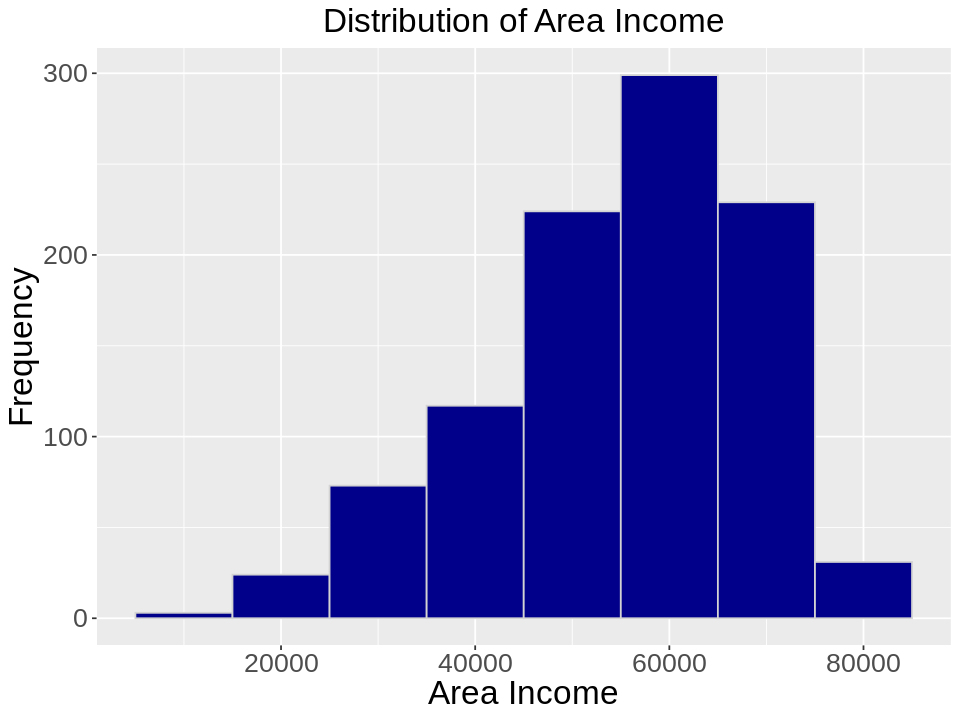

In [ ]:
# plot a histogram to visualize the distribution of values in 'area_income' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = area_income ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 10000) +
    labs(title = "Distribution of Area Income", x = "Area Income", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:
# compute the quantiles and interquartile range of the values in the 'area_income' column 
quantile(data$area_income)
cat('The interquartile range of area income is:',IQR(data$area_income))

0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80

The interquartile range of area income is: 18438.83

25% of the individuals have an area income of less than 47,032 shillings 75% of the individuals have an area income of less than 65,471 shillings 

##### Daily internet usage

In [ ]:
# compute the variance and standard deviation of the values in 'daily_time_spent_on_site' column
cat('The variance of daily internet usage is:',var(data$daily_internet_usage), '\n')
cat('The standard deviation of daily internet usage is:',sd(data$daily_internet_usage))

The variance of daily internet usage is: 1927.415 
The standard deviation of daily internet usage is: 43.90234

The standard deviation shows that the values are a bit spread out from the mean and the variance shows that the degree to which each value differs from the mean is high.

In [ ]:
# compute the range, and the minimum and maximum values in 'daily_internet_usage' column
cat("The minimum daily internet usage of an is:", min(data$daily_internet_usage),'minutes', '\n')
cat("The maximum daily internet usage of is:", max(data$daily_internet_usage),'minutes', '\n')
cat('The difference between the minimum and maximum internet usage is:', (max(data$daily_internet_usage)-min(data$daily_internet_usage)),'minutes')

The minimum daily internet usage of an is: 104.78 minutes 
The maximum daily internet usage of is: 269.96 minutes 
The difference between the minimum and maximum internet usage is: 165.18 minutes

In [ ]:
# compute the skewness and kurtosis of values in the 'daily_internet_usage' column
cat('The following are skewness and kurtosis of daily internet usage', '\n')
cat("Skewness: ", skewness(data$daily_internet_usage), '\n')
cat("Kurtosis: ", kurtosis(data$daily_internet_usage), '\n')

The following are skewness and kurtosis of daily internet usage 
Skewness:  -0.03343681 
Kurtosis:  -1.275752 


The values are fairly symmetrical and platykurtic

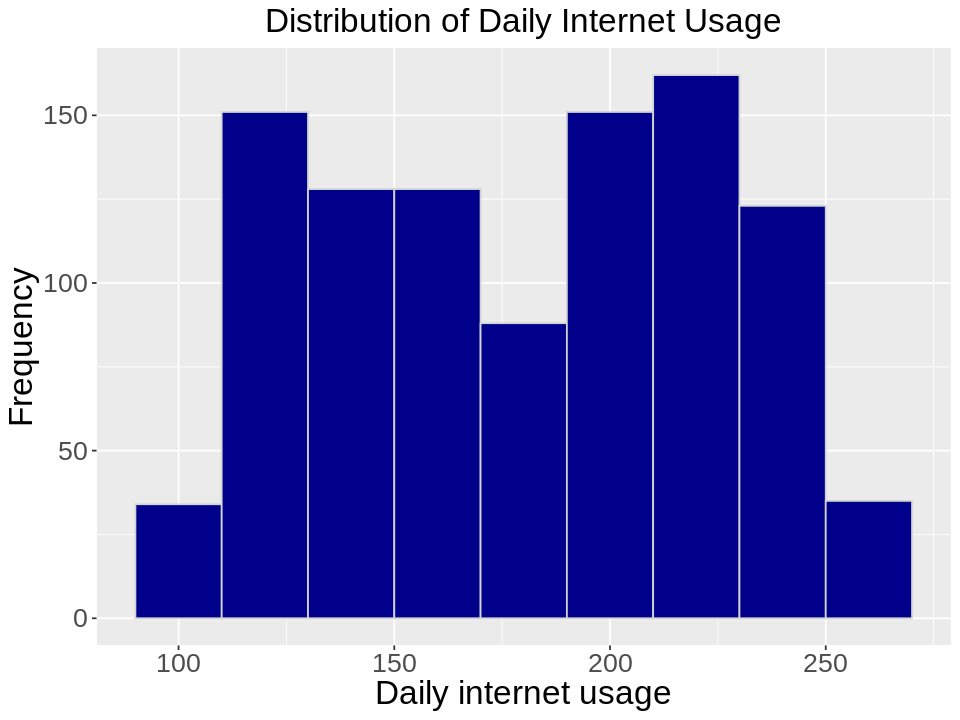

In [ ]:
# plot a histogram to visualize the distribution of values in 'daily_internet_usage' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = daily_internet_usage))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 20) +
    labs(title = "Distribution of Daily Internet Usage", x = "Daily internet usage", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:

# compute the quantiles and interquartile range of the values in the 'daily_internet_usage' column 
quantile(data$daily_internet_usage)
cat('The interquartile range of age is:',IQR(data$daily_internet_usage))

0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600

The interquartile range of age is: 79.9625

25% of the individuals spend less than 138.83 minutes online and 75% of the individuals spend less than 218.79 minutes online.

### Categorical variables

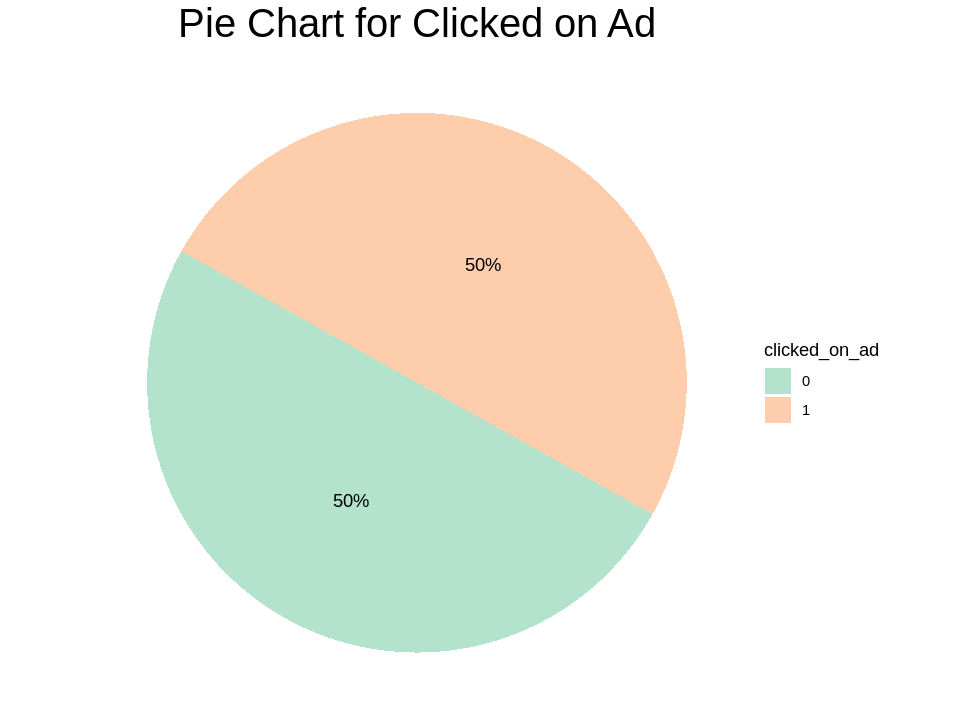

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'clicked_on_ad' column
data.clicked = data %>% 
  filter(clicked_on_ad != "NA") %>% 
  group_by(clicked_on_ad) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(clicked_on_ad)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.clicked, 
       aes(x = "", y = percentage, fill = clicked_on_ad))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text( aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel2") + labs(title= 'Pie Chart for Clicked on Ad') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


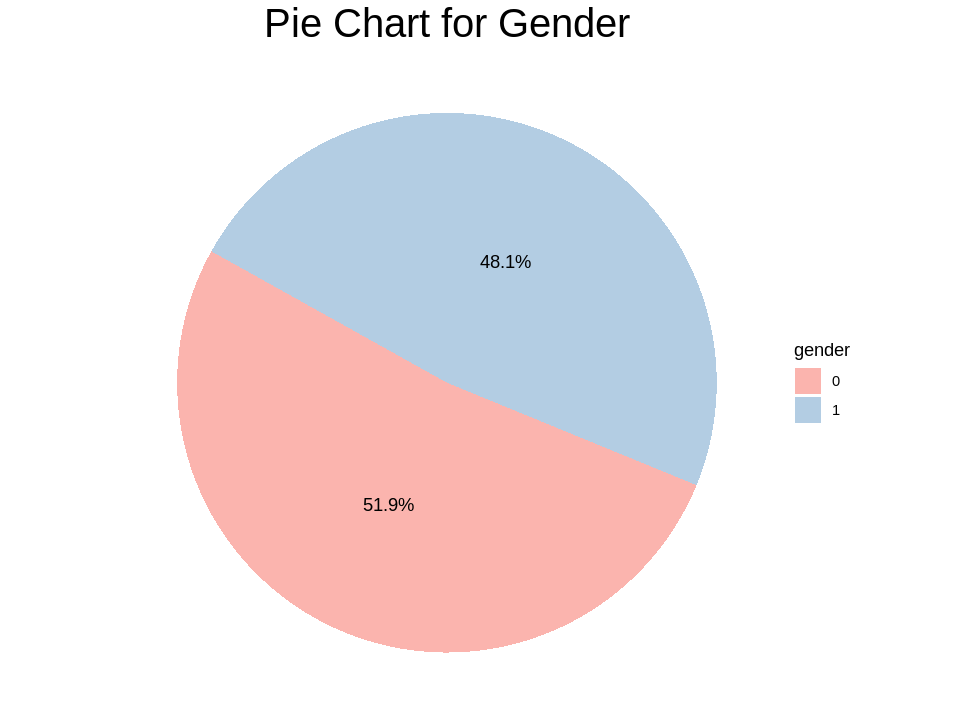

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'gender' column
data.gender = data %>% 
  filter(gender != "NA") %>% 
  group_by(gender) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(gender)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.gender, 
       aes(x = "", y = percentage, fill = gender))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel1") + labs(title= 'Pie Chart for Gender') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


data$part_of_month,n,percent
<chr>,<dbl>,<dbl>
Early,338,0.338
Late,323,0.323
Mid,339,0.339


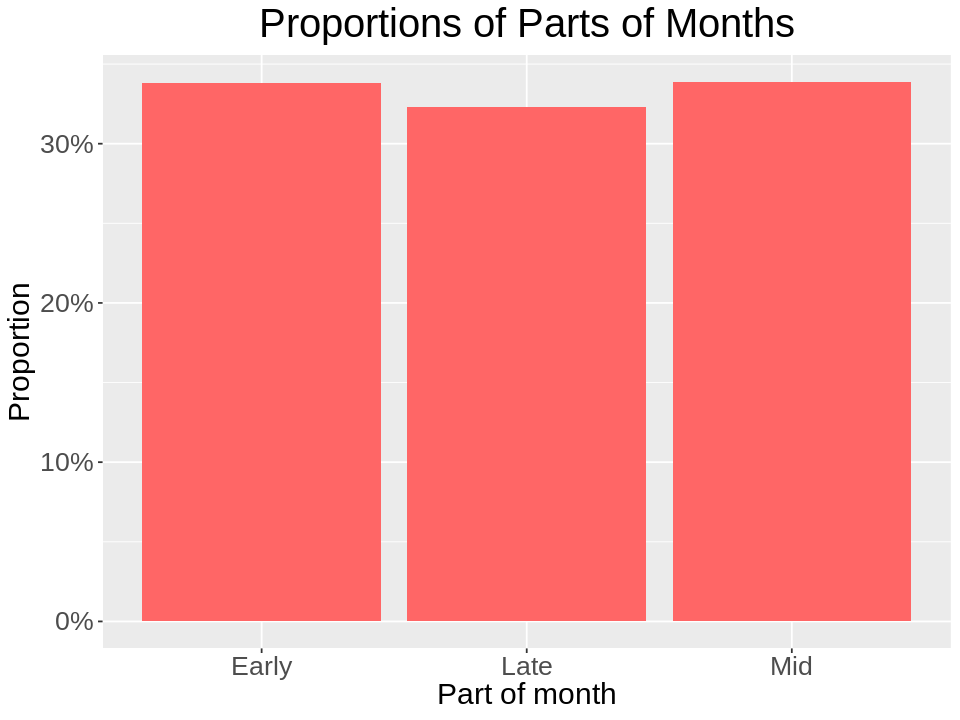

In [ ]:
# plot a bar chart to visualize the proportion of values in 'part_of_month' column
ggplot(data, aes(part_of_month)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Parts of Months', x='Part of month', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$part_of_month, sort = TRUE)

More individuals used the internet early and mid month than late in the month

data$part_of_day,n,percent
<chr>,<dbl>,<dbl>
Early afternoon,123,0.123
Early morning,136,0.136
Evening,130,0.130
Late afternoon,115,0.115
Late morning,120,0.120
Late night,113,0.113
Night,135,0.135
Towards morning,128,0.128


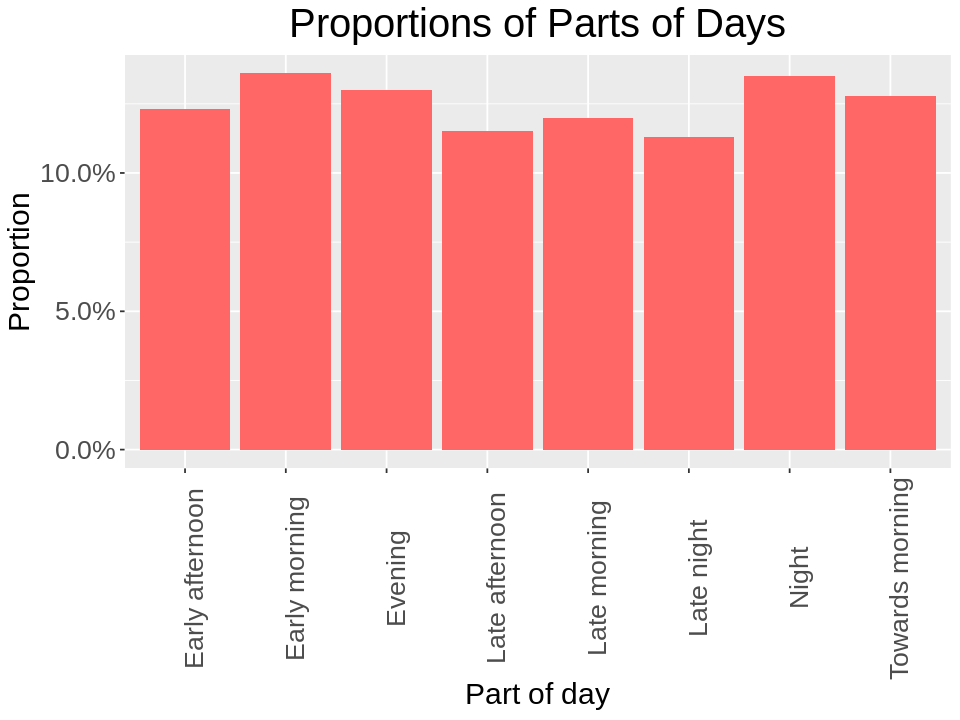

In [ ]:
# plot a bar chart to visualize the proportion of values in 'part_of_day' column
ggplot(data, aes(part_of_day)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Parts of Days', x='Part of day', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24), axis.text.x = element_text(angle = 90))
# create a frequency table to get the actual figures of frequencies of parts of day using tabyl function
tabyl(data$part_of_day, sort =TRUE,)

More individuals visited the site early in the morning than the rest of the day while fewer individuals visited the site late in the night.

data$month,n,percent
<chr>,<dbl>,<dbl>
01,147,0.147
02,160,0.160
03,156,0.156
04,147,0.147
05,147,0.147
06,142,0.142
07,101,0.101


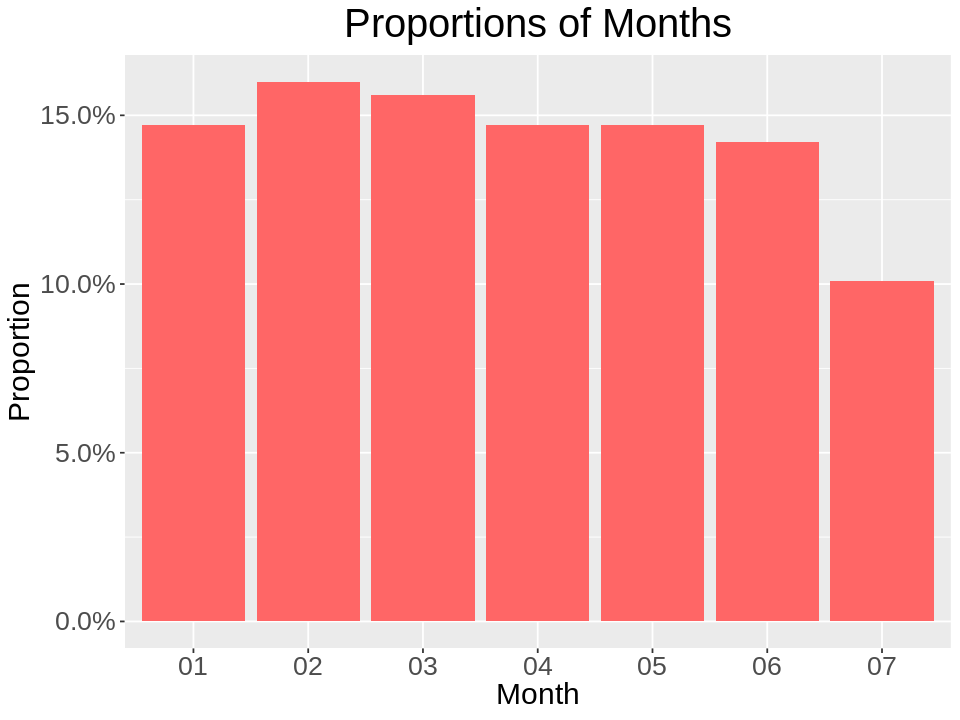

In [ ]:
# plot a bar chart to visualize the proportion of values in 'month' column
ggplot(data, aes(month)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Months', x='Month', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of months using tabyl() function
tabyl(data$month, sort =TRUE)

February had the most number of visits while July had the least number of visits

In [ ]:
# create a frequency table to get the actual figures of frequencies of countries using count function
data %>% count(country, sort = TRUE)

country,n
<chr>,<int>
Czech Republic,9
France,9
Afghanistan,8
Australia,8
Cyprus,8
Greece,8
Liberia,8
Micronesia,8
Peru,8


Czech Republic and France had the most number of visitors while Aruba and 13 other countries had the least number of visitors

## Bivariate analysis  
Bivariate analysis will help us establish the relationship between the variables, more so, the relationship between the varibles and the chances of clicking on the ads


### Recommendation for working on research question  
In order to effectively perform bivariate analysis while working on the research question, one should analyse the different variables against the 'clicked_on_ad' variable in order to identify the individuals who are likely to click on the ads

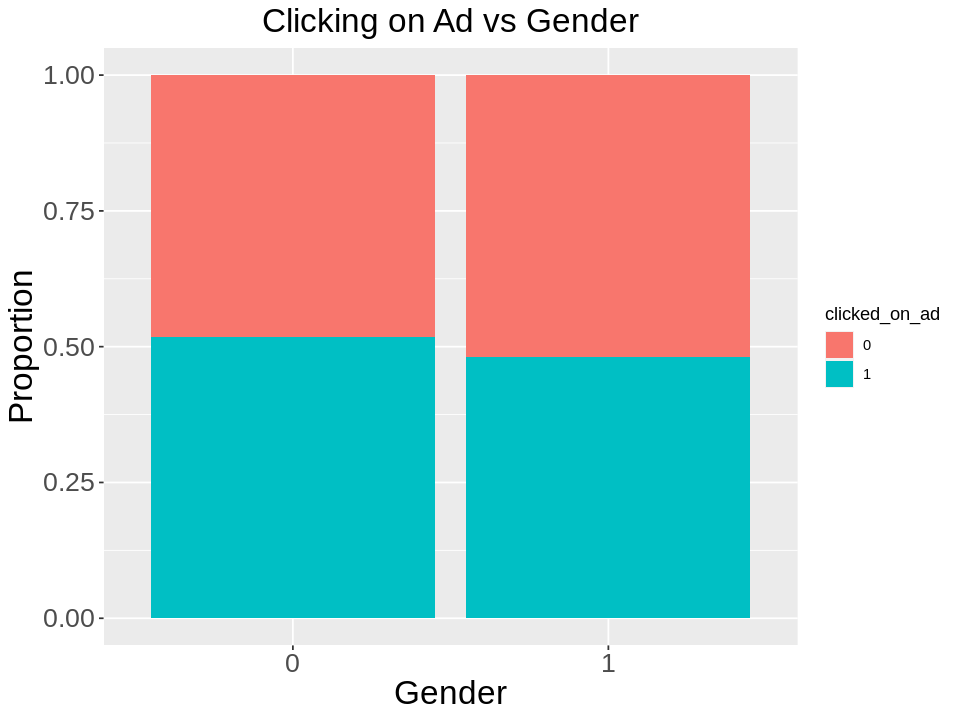

In [ ]:
# plot a stacked bar chart to visualize the relationship between gender and clicking on the ad
ggplot(data, 
       aes(x = gender, 
           fill = clicked_on_ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Gender", x = "Gender", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

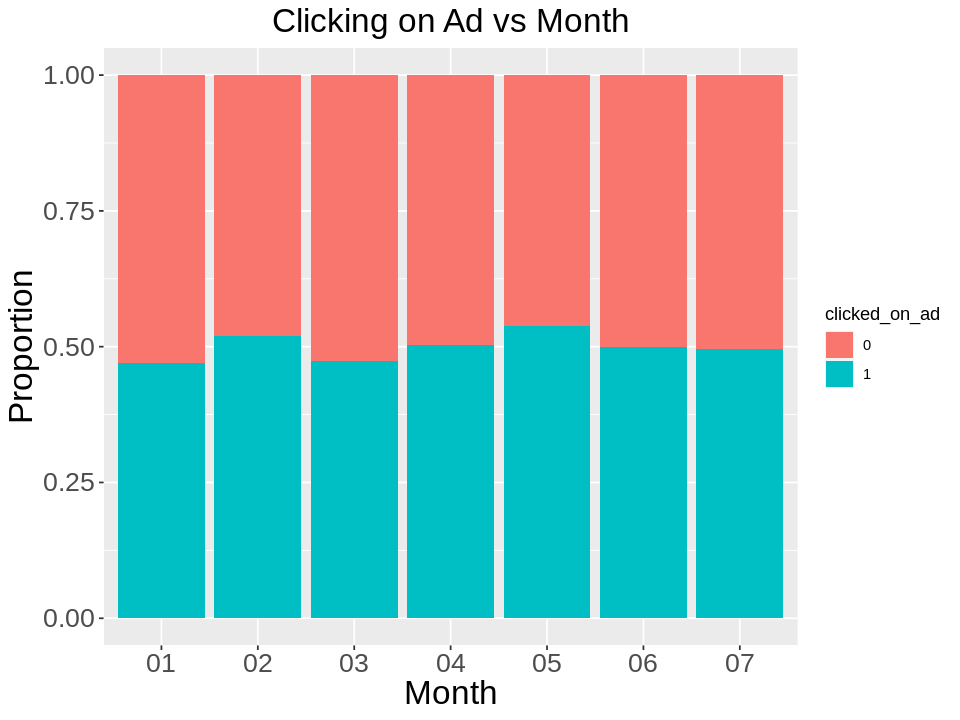

In [ ]:
# plot a stacked bar chart to visualize the relationship between month and clicking on the ad
ggplot(data, 
       aes(x = month, 
           fill = clicked_on_ad)) +  
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Month", x = "Month", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

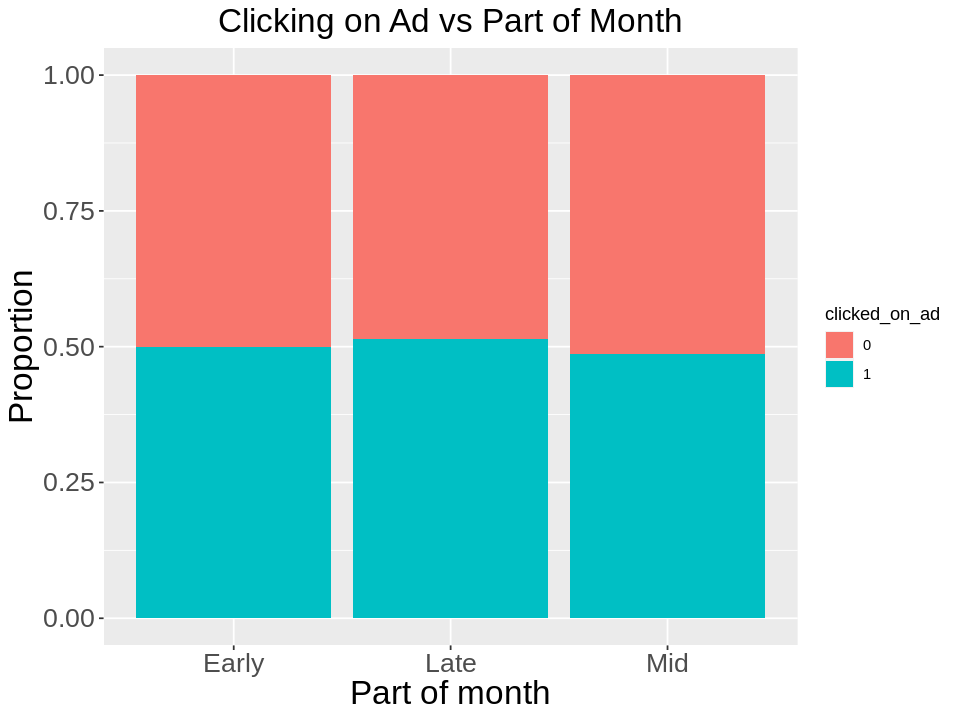

In [ ]:
# plot a stacked bar chart to visualize the relationship between part of month and clicking on the ad
ggplot(data, 
       aes(x = part_of_month, 
           fill = clicked_on_ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Part of Month", x = "Part of month", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

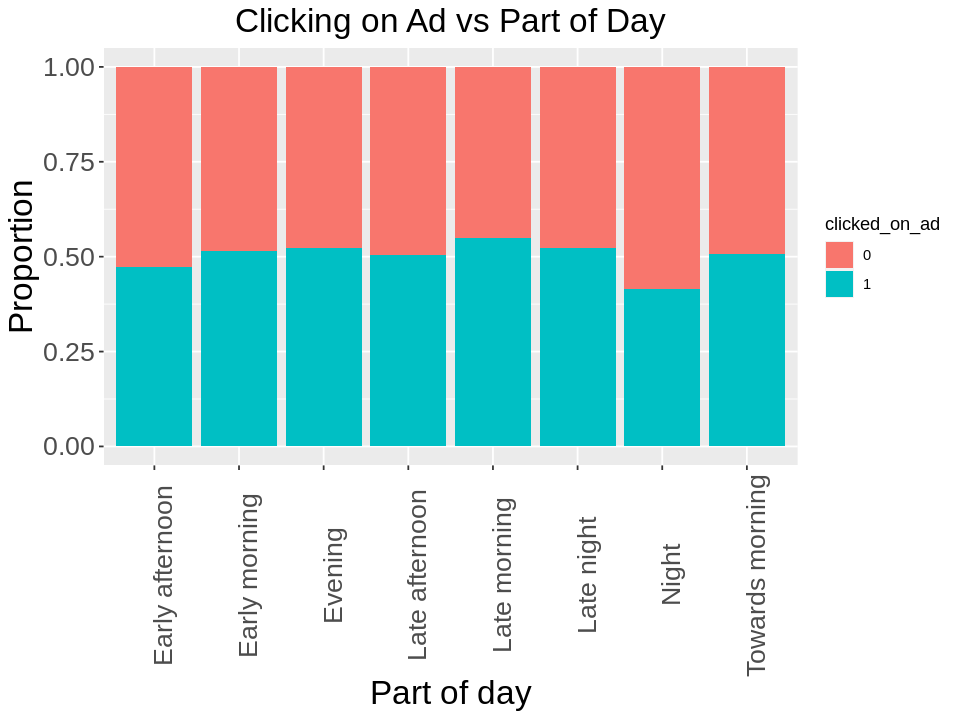

In [ ]:
# plot a stacked bar chart to visualize the relationship between part of day and clicking on the ad
ggplot(data, 
       aes(x = part_of_day, 
           fill = clicked_on_ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Part of Day", x = "Part of day", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20), 
          axis.text.x = element_text(angle = 90))

Group.1,x
<fct>,<dbl>
0,76.85462
1,53.14578


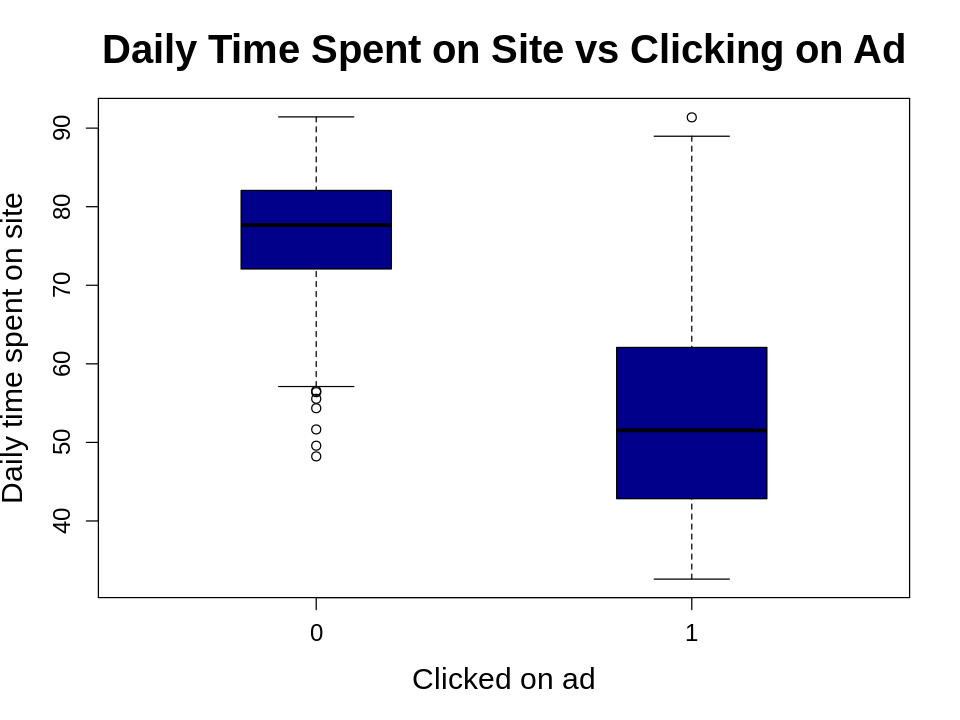

In [ ]:
# plot a boxplot to visualize the relationship between daily time spent on site and clicking on the ad
boxplot(data$daily_time_spent_on_site ~ data$clicked_on_ad, col='darkblue', main="Daily Time Spent on Site vs Clicking on Ad", xlab = "Clicked on ad", ylab = "Daily time spent on site", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)
# compute the means of daily time spent on site per group of ad clicking
aggregate(data$daily_time_spent_on_site, list(data$clicked_on_ad), mean) 

Group.1,x
<fct>,<dbl>
0,31.684
1,40.334


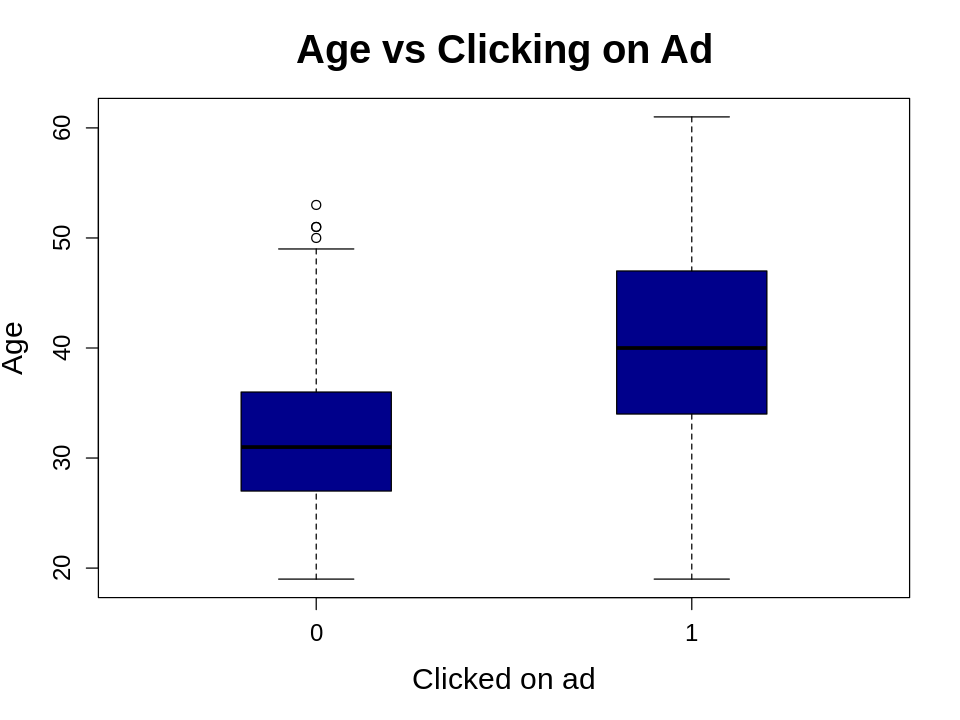

In [ ]:
# plot a boxplot to visualize the relationship between age and clicking on the ad
boxplot(data$age ~ data$clicked_on_ad, col='darkblue', main="Age vs Clicking on Ad", xlab = "Clicked on ad", ylab = "Age", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)
# compute the means of age per group of ad clicking
aggregate(data$age, list(data$clicked_on_ad), mean)

Group.1,x
<fct>,<dbl>
0,61385.59
1,48614.41


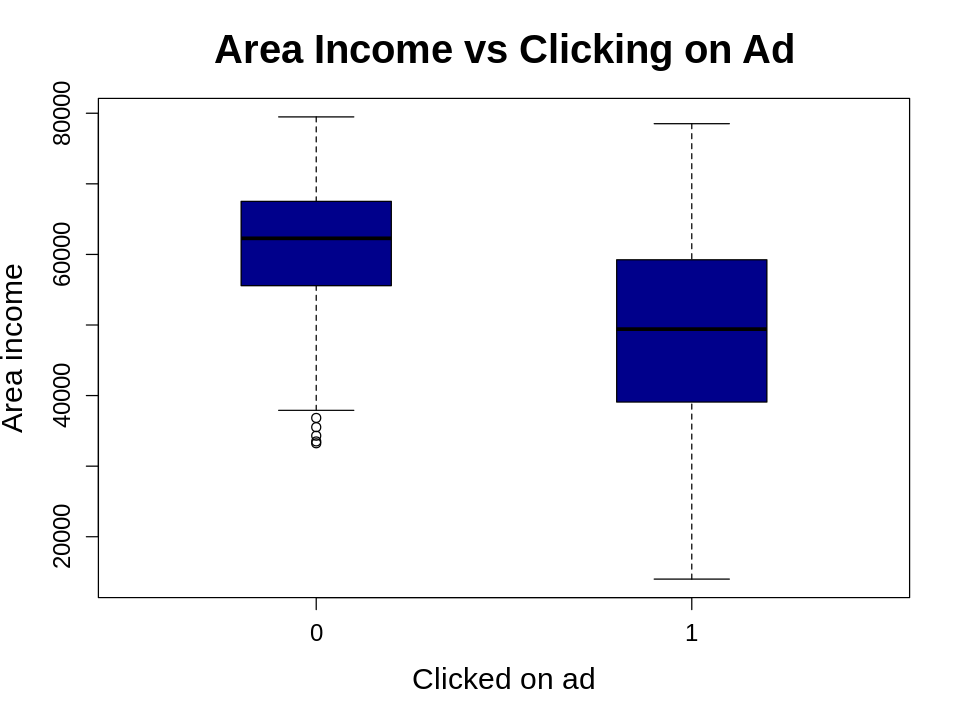

In [ ]:
# plot a boxplot to visualize the relationship between area income and clicking on the ad
boxplot(data$area_income ~ data$clicked_on_ad, col='darkblue', main="Area Income vs Clicking on Ad", xlab = "Clicked on ad", ylab = "Area income", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)
# compute the means of area income per group of ad clicking
aggregate(data$area_income, list(data$clicked_on_ad), mean) 

Group.1,x
<fct>,<dbl>
0,216.365
1,138.790


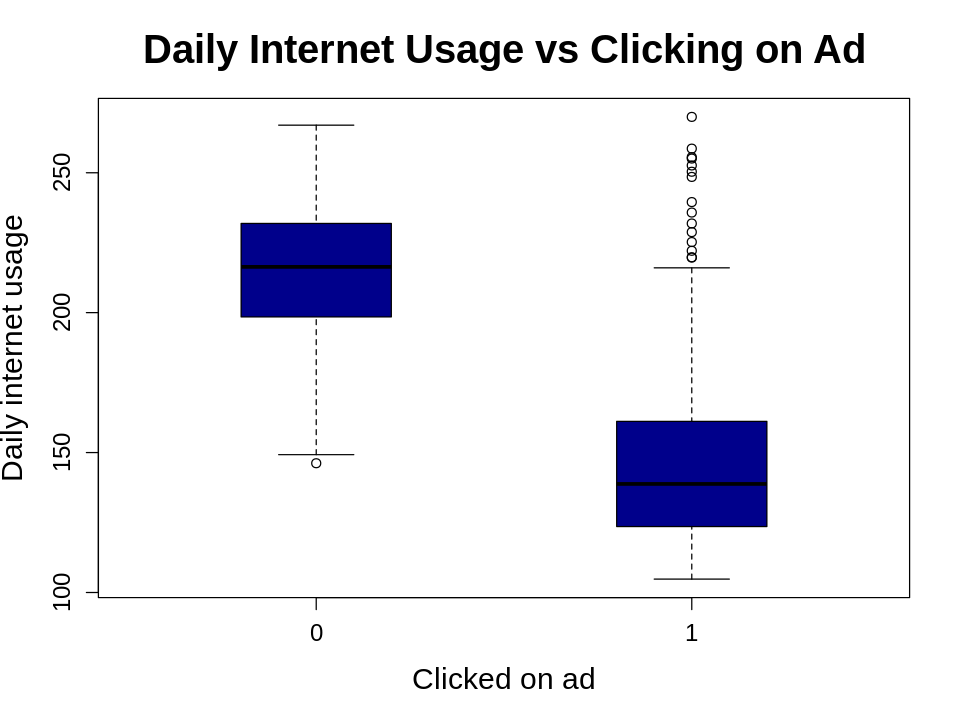

In [ ]:
# plot a boxplot to visualize the relationship between daily time spent on site and clicking on the ad
boxplot(data$daily_internet_usage ~ data$clicked_on_ad, col='darkblue', main="Daily Internet Usage vs Clicking on Ad", xlab = "Clicked on ad", ylab = "Daily internet usage", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)
# compute the means of daily internet usage per group of ad clicking
aggregate(data$daily_internet_usage, list(data$clicked_on_ad), median) 

In [ ]:
# Pearson correlation analysis

# identify numerical variables in the dataframe
num_col <- unlist(lapply(data, is.numeric))

# select and subset the numerical variables
data_num <- subset(data, select=num_col) 

# compute the correlations between the variables and display the correlation matrix
cor(data_num)

,daily_time_spent_on_site,age,area_income,daily_internet_usage
daily_time_spent_on_site,1.0000000,-0.3315133,0.3109544,0.5186585
age,-0.3315133,1.0000000,-0.1826050,-0.3672086
area_income,0.3109544,-0.1826050,1.0000000,0.3374955
daily_internet_usage,0.5186585,-0.3672086,0.3374955,1.0000000


Other than 'daily_time_spent_on_site' and 'daily_internet_usage', which are moderately correlated, the other variables have low or no correlation.

## Conclusions
* The proportion of females clicking on the ads is higher than the males', meaning that the ads were more appealing to the females more than the males
* More than 50% of the individuals that visited the site in May and February clicked on the ads, while January and March had the fewest propotions of number of clicks
* Even though there were fewer numbers of visits in the later days of the various months than in the earlier days, more than 50% of the individuals who visited the site in the later days of the months clicked on the ads. 50% of the individuals that visited the site in the earlier days of the months clicked on the ads and just a little less than 50% of the individuals that visited the site in the mid days of the months clicked on the ads
* Most of the individuals visiting the site in the late morning hours clicked on the ads. A little bit over 50% of the individuals visiting the site in the early morning, evening and late night hours clicked on the ads
* The median time spent on the site is 53.15 minutes for the individuals who clicked on the ads while it is 76.85 minutes for the individuals who did not click on the ads; additionally, 50% of the individuals who clicked on the ads spent between 42.84 minutes and 62.08 minutes on site while 50% of the individuals who did not click on the ads spent between 72.08 minutes and 82.07 minutes on site
* The median age of the individuals who did not click on the ads is 31.68 years while the median age of the individuals who clicked on the ads is 40.33 years; morever, the age of 50% of the individuals who clicked on the ads is between 34 years and 47 years while the age of 50% of the individuals who did not click on the ads is between 27 years and 36 years.
* The median income of the individuals who click on the ads is 48614.41 shillings and the median area income of the individuals who do not click on the ads is 61385.59 shillings; additionally, 50% of the individuals who click on the ads have an area income of between Ksh39106.62 and Ksh59241.04 while 50% of the individuals who do not click on the ads have an area income of between Ksh55606.66 and Ksh67518.78
* The median daily internet usage of the individuals who click on ads is 138.79 minutes while the median daily internet usage of the individuals who do not click on the ads is 216.365 minutes; additionally, 50% of the individuals who click on the ads spend between 123.59 minutes and 161.16 minutes online while 50% of the individuals who do not click on the ads spend between 198.48 minutes and 231.87 minutes online
* Data on the different countries was not substantial for us to conduct conclusive analysis

## Recommendations
* The client should review the content that she posted in the various months and tailor more of her content to be simillar to ones posted in May and February as the content could have contributed to the higher traffic and higher proportions of ad clicks
* As much as the site is visited by more males than females, the ads are clicked on by more females than males. The client could create various ads that appeal to the genders differently so as to get more people click on the ads.
* Most of the individuals interested in cryptography do not spend a lot of time on the site or online; therefore, the client should tailor her sessions to take between 45 minutes to 60 minutes per day
* Most of the individuals who are interested in cryptography belong in the older age groups; therefore the course content should be appealing to the individuals in those age brackets so as to ensure client satisfaction
* If the clients goal is to attract more individuals in the younger age groups, she should consider revising her blog's content so as to pique their interests
* Since the area income of the individuals who are interested in cryptography is quite low, the price of course should be considerably low.


## Modeling

### Data preparation

In [ ]:
# create a copy of the dataset that would be used in modelling 
data_model <- data 

# encode the values in 'part_of_month' column
data_model$part_of_month <- ifelse(data_model$part_of_month == "Early", 1,
              ifelse(data_model$part_of_month == "Mid", 2, 3))

# encode values in 'part_of_day' column
data_model$part_of_day <- ifelse(data_model$part_of_day == "Late night", 1,
              ifelse(data_model$part_of_day == "Towards morning", 2,
              ifelse(data_model$part_of_day == "Early morning", 3,
              ifelse(data_model$part_of_day == "Late morning", 4,
              ifelse(data_model$part_of_day == "Early afternoon", 5,
              ifelse(data_model$part_of_day == "Late afternoon", 6,
              ifelse(data_model$part_of_day == "Evening", 7,8)))))))

# change the data types of 'part_of_day' and 'part_of_month' columns to 'factor'
data_model <- transform(data_model, part_of_day=as.factor(part_of_day), part_of_month=as.factor(part_of_month))

# drop irrelevant columns
data_model <-data_model %>% select(-c(country, month))

# preview the first few records in the dataset
head(data_model)


daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,clicked_on_ad,part_of_month,part_of_day
<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
68.95,35,61833.90,256.09,0,0,3,1
80.23,31,68441.85,193.77,1,0,1,1
69.47,26,59785.94,236.50,0,0,2,7
74.15,29,54806.18,245.89,1,0,1,1
68.37,35,73889.99,225.58,0,0,1,2
59.99,23,59761.56,226.74,1,0,2,5


In [ ]:
# split the data into train and test sets
set.seed(32)
split = sample.split(data_model$clicked_on_ad, SplitRatio = .70) # the training set will contain 70% of the data and test set will contain the remaining 30%
train = subset(data_model, split == TRUE)
test  = subset(data_model, split == FALSE)

# check the dimensions of the train and test sets
dim(train)
dim(test)

[1] 700   8

[1] 300   8

### Random forest

In [ ]:
# grid search the optimal hyperparameter values and train the random forest model 
model <- train(clicked_on_ad ~., data = train, method = "ranger",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

In [ ]:
# check the performance of the model with the different hyperparameter values and find out the selected values 
model

Random Forest 

700 samples
  7 predictor
  2 classes: '0', '1' 

Pre-processing: centered (14), scaled (14) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9585714  0.9171429
   2    extratrees  0.9625714  0.9251429
   3    gini        0.9585714  0.9171429
   3    extratrees  0.9628571  0.9257143
   4    gini        0.9557143  0.9114286
   4    extratrees  0.9605714  0.9211429
   6    gini        0.9557143  0.9114286
   6    extratrees  0.9605714  0.9211429
   7    gini        0.9540000  0.9080000
   7    extratrees  0.9608571  0.9217143
   8    gini        0.9540000  0.9080000
   8    extratrees  0.9614286  0.9228571
  10    gini        0.9557143  0.9114286
  10    extratrees  0.9605714  0.9211429
  11    gini        0.9540000  0.9080000
  11    extratrees  0.9588571  0.9177143
  12    gini        0.9528571 

In [ ]:
# make predictions of the results of the test data using the trained random forest model
pred = predict(model, newdata=test)

In [ ]:
# evaluate the performance of the model using the confusionMatrix() function
confusionMatrix(pred, test$clicked_on_ad)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148   6
         1   2 144
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9481, 0.9884)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9467          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9867          
            Specificity : 0.9600          
         Pos Pred Value : 0.9610          
         Neg Pred Value : 0.9863          
             Prevalence : 0.5000          
         Detection Rate : 0.4933          
   Detection Prevalence : 0.5133          
      Balanced Accuracy : 0.9733          
                                          
       'Positive' Class : 0               
                              

The confusion matrix output shows that the model was able to accurately predict 97.33% of the data in the test set meaning that the model is excellent at classifying whether or not a visitor clicks an ad

## Challenging the solution

As much as the performance of the random forest model is satisfactory, we will challenge it by building linear and radial svm models to check whether they will perform better.

### SVM

#### Linear

In [ ]:
# cross validate the optimal hyperparameter values and train the svm linear model 
model_linear <- train(clicked_on_ad ~., data = train, method = "svmLinear",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

In [ ]:
# check the performance of the model with the different hyperparameter values and find out the selected values 
model_linear

Support Vector Machines with Linear Kernel 

700 samples
  7 predictor
  2 classes: '0', '1' 

Pre-processing: centered (14), scaled (14) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results:

  Accuracy   Kappa    
  0.9645714  0.9291429

Tuning parameter 'C' was held constant at a value of 1

In [ ]:
# make predictions of the results of the test data using the trained svm linear model
pred_linear = predict(model_linear, newdata=test)

In [ ]:
# evaluate the performance of the model using the confusionMatrix() function
confusionMatrix(pred_linear, test$clicked_on_ad)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 146   5
         1   4 145
                                          
               Accuracy : 0.97            
                 95% CI : (0.9438, 0.9862)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.94            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9733          
            Specificity : 0.9667          
         Pos Pred Value : 0.9669          
         Neg Pred Value : 0.9732          
             Prevalence : 0.5000          
         Detection Rate : 0.4867          
   Detection Prevalence : 0.5033          
      Balanced Accuracy : 0.9700          
                                          
       'Positive' Class : 0               
                              

The linear svm model's accuracy is slightly lower than the random forest's

#### Radial

In [ ]:
# cross validate the optimal hyperparameter values and train the svm radial model 
model_rad <- train(clicked_on_ad ~., data = train, method = "svmRadial",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

In [ ]:
# check the performance of the model with the different hyperparameter values and find out the selected values 
model_rad

Support Vector Machines with Radial Basis Function Kernel 

700 samples
  7 predictor
  2 classes: '0', '1' 

Pre-processing: centered (14), scaled (14) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.9637143  0.9274286
    0.50  0.9622857  0.9245714
    1.00  0.9628571  0.9257143
    2.00  0.9571429  0.9142857
    4.00  0.9548571  0.9097143
    8.00  0.9502857  0.9005714
   16.00  0.9482857  0.8965714
   32.00  0.9440000  0.8880000
   64.00  0.9400000  0.8800000
  128.00  0.9368571  0.8737143

Tuning parameter 'sigma' was held constant at a value of 0.04608698
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04608698 and C = 0.25.

In [ ]:
# make predictions of the results of the test data using the trained svm radial model
pred_rad = predict(model_rad, newdata=test)

In [ ]:
# evaluate the performance of the model using the confusionMatrix() function
confusionMatrix(pred_rad, test$clicked_on_ad)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 149   8
         1   1 142
                                          
               Accuracy : 0.97            
                 95% CI : (0.9438, 0.9862)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.94            
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.9933          
            Specificity : 0.9467          
         Pos Pred Value : 0.9490          
         Neg Pred Value : 0.9930          
             Prevalence : 0.5000          
         Detection Rate : 0.4967          
   Detection Prevalence : 0.5233          
      Balanced Accuracy : 0.9700          
                                          
       'Positive' Class : 0               
                              

The radial svm accuracy is lesser than the linear svm's and the random forest's however it has classified the 'not clicked' cases better than the other two models

## Conclusions
* The project can be considered successful as we have managed to built models with high accuracy and precision scores. 
* The random forest model is the best for our dataset as it had the best accuracy score
